In [47]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import serial
from spectrum import *
import pyqtgraph as pg
from pyqtgraph.Qt import QtGui, QtCore

# Create object serial port
portName = "COM5"                      # replace this port name by yours!
baudrate = 115200
# ser = serial.Serial(portName,baudrate)

fftLen = 2048
shift = 100
signal_scale = 1. / 2000

capture_setting = {
    "ch" : 1,
    "fs" : 16000,
    "chunk" : shift
    }


global fftLen, capture_setting, signal_scale



# ========
#  Layout
# ========

### アプリケーション作成
app = QtGui.QApplication([])
app.quitOnLastWindowClosed()
### メインウィンドウ
mainWindow = QtGui.QMainWindow()
mainWindow.setWindowTitle("Spectrum Analyzer") # Title
mainWindow.resize(800, 300) # Size
### キャンパス
centralWid = QtGui.QWidget()
mainWindow.setCentralWidget(centralWid)
### レイアウト！！
lay = QtGui.QVBoxLayout()
centralWid.setLayout(lay)

### スペクトル表示用ウィジット
specWid = pg.PlotWidget(name="spectrum")
specItem = specWid.getPlotItem()
specItem.setMouseEnabled(y = False) # y軸方向に動かせなくする
specItem.setYRange(0, 1000)
specItem.setXRange(0, fftLen / 2, padding = 0)
### Axis
specAxis = specItem.getAxis("bottom")
specAxis.setLabel("Frequency [Hz]")
specAxis.setScale(fs / 2. / (fftLen / 2 + 1))
hz_interval = 500
newXAxis = (arange(int(fs / 2 / hz_interval)) + 1) * hz_interval
oriXAxis = newXAxis / (fs / 2. / (fftLen / 2 + 1))
specAxis.setTicks([zip(oriXAxis, newXAxis)])
### キャンパスにのせる
lay.addWidget(specWid)

### ウィンドウ表示
mainWindow.show()

### Update

###まず100個データを集める
count = 0

data = np.zeros(0)

while count == 100:
#         value = ser.readline()
#         data = np.append(data,int(value))
    data = np.array([875, 849, 848, 1700, 841, 861, 855, 865, 860, 876, 882, 874, 865, 879, 862, 916, 881, 875, 885, 878, 859, 897, 880, 845, 901, 1759, 898, 900, 857, 881, 868, 856, 880, 863, 856, 880, 878, 844, 877, 864, 843, 858, 878, 865, 855, 879, 917, 882, 938, 884, 975, 926, 914, 942, 961, 915, 942, 901, 920, 920, 881, 940, 925, 875, 1777, 879, 891, 910, 865, 898, 921, 922, 914, 923, 901, 883, 933, 484, 399, 1798, 926, 877, 921, 977, 898, 923, 939, 945, 920, 954, 948, 998, 975, 901, 942, 945, 915, 1815, 864, 918])
#         print(data)
    count += 1

while 1:
    if len(data) == 100:
        AR, P, k  = arburg(data, 8)
        BBB = arma2psd(AR,sides='centerdc')
        PSD = BBB[2048:4096]
        y = 10*log10(PSD/max(PSD))
        specItem.plot(y, clear = True)
        QtGui.QApplication.processEvents()
break





# AR, P, k  = arburg(data, 8)
# BBB = arma2psd(AR,sides='centerdc')
# PSD = BBB[2048:4096]
# y = 10*log10(PSD/max(PSD))

# plt.axis([0,0.4,-55,-30])
# plt.grid()
# plt.plot(linspace(0, 0.5, len(PSD)), y)


        
    

# ser.close()

SyntaxError: import * only allowed at module level (<ipython-input-47-6ec2fd1d9fd5>, line 2)

In [6]:
ser.close()

[875, 849, 848, 1700, 841, 861, 855, 865, 860, 876, 882, 874, 865, 879, 862, 916, 881, 875, 885, 878, 859, 897, 880, 845, 901, 1759, 898, 900, 857, 881, 868, 856, 880, 863, 856, 880, 878, 844, 877, 864, 843, 858, 878, 865, 855, 879, 917, 882, 938, 884, 975, 926, 914, 942, 961, 915, 942, 901, 920, 920, 881, 940, 925, 875, 1777, 879, 891, 910, 865, 898, 921, 922, 914, 923, 901, 883, 933, 484, 399, 1798, 926, 877, 921, 977, 898, 923, 939, 945, 920, 954, 948, 998, 975, 901, 942, 945, 915, 1815, 864, 918]
[4.10503335e+04 1.08148956e+04 3.36959126e+03 ... 1.01644306e+00
 1.01651202e+00 1.01655340e+00]


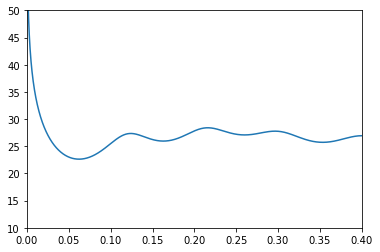

In [34]:
# 
# l_n=list(map(int,data))
print(data)

data = l_n

AR, P, k = arburg(data, 8)
BBB = arma2psd(AR,sides='centerdc')
PSD = BBB[2048:4096]
y = 10*log10(PSD/max(PSD))+73
print(PSD)

plt.axis([0,0.4,10,50])
plt.plot(linspace(0, 0.4,len(PSD)), y)

In [40]:
d = np.array([875, 849, 848, 1700, 841, 861, 855, 865, 860, 876, 882, 874, 865, 879, 862, 916, 881, 875, 885, 878, 859, 897, 880, 845, 901, 1759, 898, 900, 857, 881, 868, 856, 880, 863, 856, 880, 878, 844, 877, 864, 843, 858, 878, 865, 855, 879, 917, 882, 938, 884, 975, 926, 914, 942, 961, 915, 942, 901, 920, 920, 881, 940, 925, 875, 1777, 879, 891, 910, 865, 898, 921, 922, 914, 923, 901, 883, 933, 484, 399, 1798, 926, 877, 921, 977, 898, 923, 939, 945, 920, 954, 948, 998, 975, 901, 942, 945, 915, 1815, 864, 918])

In [41]:
d

array([ 875,  849,  848, 1700,  841,  861,  855,  865,  860,  876,  882,
        874,  865,  879,  862,  916,  881,  875,  885,  878,  859,  897,
        880,  845,  901, 1759,  898,  900,  857,  881,  868,  856,  880,
        863,  856,  880,  878,  844,  877,  864,  843,  858,  878,  865,
        855,  879,  917,  882,  938,  884,  975,  926,  914,  942,  961,
        915,  942,  901,  920,  920,  881,  940,  925,  875, 1777,  879,
        891,  910,  865,  898,  921,  922,  914,  923,  901,  883,  933,
        484,  399, 1798,  926,  877,  921,  977,  898,  923,  939,  945,
        920,  954,  948,  998,  975,  901,  942,  945,  915, 1815,  864,
        918])